In [28]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

# load the MNIST dataset using the Keras helper function.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28) (10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

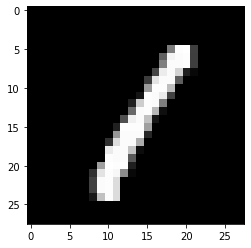

In [29]:
print(X_train.shape, X_test.shape)
np.set_printoptions(threshold=np.inf, linewidth=300)
print(X_train[3])      # sample 3.

plt.imshow(X_train[3],cmap="gray")
plt.show()

In [30]:
# Reshape dataset to reflect a single channel.
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")  # No. of samples, row, column, channel
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")

# Rescale pixel values from [0-255] to [0-1] 
X_train,X_test= X_train/255, X_test/255

In [31]:
# one hot encode categorical labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


### CNN structure 
#### Input layer (1x28x28) -> Conv Layer (32 filters, 5x5) -> Max Pooling (2x2) -> Dropout layer (20%) -> Flatten layer -> Fully connected layer (128 neurons) -> Output layer (10 neurons)

In [32]:
# CNN and fully connected model
def cnn_dense_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer with 32 filters of size 3x3
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))     # regularization by dropout 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Training and evaluation of model

In [33]:
model=cnn_dense_model()
cnn_history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=5, batch_size=100)

C:\Users\paul\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 78s 1ms/step - loss: 0.3727 - accuracy: 0.8896 - val_loss: 0.1630 - val_accuracy: 0.9501
Epoch 2/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1457 - accuracy: 0.9561 - val_loss: 0.0935 - val_accuracy: 0.9708
Epoch 3/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1019 - accuracy: 0.9689 - val_loss: 0.0802 - val_accuracy: 0.9746
Epoch 4/5
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0759 - accuracy: 0.9773 - val_loss: 0.0639 - val_accuracy: 0.9792
Epoch 5/5
60000/60000 [==============================] - 2895s 48ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0523 - val_accuracy: 0.9824


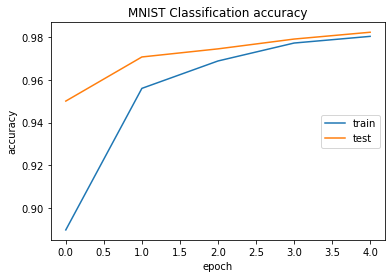

In [34]:
# Visualizing training and validation accuracies

plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title( "MNIST Classification accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train" , "test"], loc="right")
plt.show()

### Make a prediction using a given image 
###### Now we leverage on the CNN-MIST trained model and make prediction on a new image. We extract and save an image from the MNIST dataset and make prediction with it. 


In [38]:
# Extract and save 10th sample which is image number '3' from the MNIST dataset.
# Convert a sample array to image
img=X_train[10]*255         # take sample 10. We multiply by 255 to get initial pixel values 
img.resize(28,28,1)     # the array_to_image function takes 3 parameters, so resize image to Row,col,channel
sample_10= array_to_img(img)    # save the image into current directory
sample_10.save("10th_sample.png")

img = load_img("10th_sample.png", color_mode = "grayscale", target_size=(28, 28)) # load image
img = img_to_array(img)  # convert image to array
img = img.reshape(1, 28, 28, 1).astype('float32')  # reshape image into a single sample with 1 channel
img = img / 255    # Standardize image pixel to range [0-1]

num_predict=model.predict_classes(img)
print('MNIST image number 3 predicted as: ', num_predict)

MNIST image number 3 predicted as:  [3]
